#  Comic Book Data EDA for Redo

In [1]:
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Elliot Weiss\Desktop\07-10-2019 16_44_18.csv", sep=';')

In [3]:
df.head()

,Title,Series,Condition,Publisher,Month Published,Year Published,Tags,Description,Cover Price,Full Price,URL
0,Action Comics (1938 DC) 649 VF,1938 DC,VF,DC,Jan,1990,Superman,Cover art by George Perez. Man and Machine (Th...,$0.75,$8.00,https://www.mycomicshop.com/search?IID=6378081...
1,Action Comics (1938 DC) 650 VF 8.0,1938 DC,VF .,DC,Feb,1990,Superman,Cover art by George Perez. Reflections starrin...,$0.75,$9.60,https://www.mycomicshop.com/search?IID=6286761...
2,Alien Legion (1984 1st Series) 13 FN,1984 1st Series,FN,Marvel/Epic,Apr,1986,NaN,"""Moonlillies for Coracora!"" Created by Carl Po...",$1.50,$3.60,https://www.mycomicshop.com/search?IID=3893091...
3,Alpha Flight (1983 1st Series) 13 VF,1983 1st Series,VF,Marvel,Aug,1984,"Hero/Villain Teams, Wolverine","""Nightmare"" Guest-starring Wolverine (in a dre...",$0.60,$4.40,https://www.mycomicshop.com/search?IID=9705191...
4,Alpha Flight (1983 1st Series) 17 VF,1983 1st Series,VF,Marvel,Dec,1984,"Hero/Villain Teams, Wolverine, X-Men","""Dreams Die Hard...!"" Guest-starring Wolverine...",$0.60,$4.00,https://www.mycomicshop.com/search?IID=6631491...


##  Additonal Cleaning for Visualizations

In [4]:
df.columns = ['full_title', "series", "cond", "publisher", "pub_month","pub_year", "tags", "description","cover_price", "curr_price", "url" ]

In [5]:
df.head()

,full_title,series,cond,publisher,pub_month,pub_year,tags,description,cover_price,curr_price,url
0,Action Comics (1938 DC) 649 VF,1938 DC,VF,DC,Jan,1990,Superman,Cover art by George Perez. Man and Machine (Th...,$0.75,$8.00,https://www.mycomicshop.com/search?IID=6378081...
1,Action Comics (1938 DC) 650 VF 8.0,1938 DC,VF .,DC,Feb,1990,Superman,Cover art by George Perez. Reflections starrin...,$0.75,$9.60,https://www.mycomicshop.com/search?IID=6286761...
2,Alien Legion (1984 1st Series) 13 FN,1984 1st Series,FN,Marvel/Epic,Apr,1986,NaN,"""Moonlillies for Coracora!"" Created by Carl Po...",$1.50,$3.60,https://www.mycomicshop.com/search?IID=3893091...
3,Alpha Flight (1983 1st Series) 13 VF,1983 1st Series,VF,Marvel,Aug,1984,"Hero/Villain Teams, Wolverine","""Nightmare"" Guest-starring Wolverine (in a dre...",$0.60,$4.40,https://www.mycomicshop.com/search?IID=9705191...
4,Alpha Flight (1983 1st Series) 17 VF,1983 1st Series,VF,Marvel,Dec,1984,"Hero/Villain Teams, Wolverine, X-Men","""Dreams Die Hard...!"" Guest-starring Wolverine...",$0.60,$4.00,https://www.mycomicshop.com/search?IID=6631491...


In [6]:
df["title"] = df["full_title"].apply(lambda x: x.split(" (")[0])

In [7]:
df["cover_price"] = df["cover_price"].replace( '[\$,)]','', regex=True ).astype(float)

In [8]:
df["curr_price"] = df["curr_price"].replace( '[\$,)]','', regex=True ).astype(float)

In [9]:
def letters(input):
    return "".join(filter(str.isalpha, input))

In [10]:
df["cond"] = df["cond"].apply(letters)

In [11]:
df["cond"] = df["cond"].apply(lambda x: x[-2:])

In [12]:
df["issue"] = df["full_title"].apply(lambda x: x.split(")")[1])

In [13]:
def issue_cleaner(input):
    for cond in set(df["cond"]):
        if cond in input:
            return input.split(" {}".format(cond))[0]

In [14]:
df["issue"] = df["issue"].apply(issue_cleaner)

In [15]:
df["issue_num"] = df["issue"].apply(lambda x : int(re.findall(r'\d+', x)[0]))

In [30]:
df = df[['full_title',"title", "issue","issue_num","series", "cond", "publisher", "pub_month","pub_year", "tags", "description","cover_price", "curr_price", "url" ]]

In [33]:
df.to_excel(r"C:\Users\Elliot Weiss\Desktop\comic_data_for_Tableau.xlsx")

## Visualizations and EDA

In [17]:
df.head()

,full_title,title,issue,issue_num,series,cond,publisher,pub_month,pub_year,tags,description,cover_price,curr_price,url
0,Action Comics (1938 DC) 649 VF,Action Comics,649,649,1938 DC,VF,DC,Jan,1990,Superman,Cover art by George Perez. Man and Machine (Th...,0.75,8.0,https://www.mycomicshop.com/search?IID=6378081...
1,Action Comics (1938 DC) 650 VF 8.0,Action Comics,650,650,1938 DC,VF,DC,Feb,1990,Superman,Cover art by George Perez. Reflections starrin...,0.75,9.6,https://www.mycomicshop.com/search?IID=6286761...
2,Alien Legion (1984 1st Series) 13 FN,Alien Legion,13,13,1984 1st Series,FN,Marvel/Epic,Apr,1986,NaN,"""Moonlillies for Coracora!"" Created by Carl Po...",1.50,3.6,https://www.mycomicshop.com/search?IID=3893091...
3,Alpha Flight (1983 1st Series) 13 VF,Alpha Flight,13,13,1983 1st Series,VF,Marvel,Aug,1984,"Hero/Villain Teams, Wolverine","""Nightmare"" Guest-starring Wolverine (in a dre...",0.60,4.4,https://www.mycomicshop.com/search?IID=9705191...
4,Alpha Flight (1983 1st Series) 17 VF,Alpha Flight,17,17,1983 1st Series,VF,Marvel,Dec,1984,"Hero/Villain Teams, Wolverine, X-Men","""Dreams Die Hard...!"" Guest-starring Wolverine...",0.60,4.0,https://www.mycomicshop.com/search?IID=6631491...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 14 columns):
full_title     562 non-null object
title          562 non-null object
issue          562 non-null object
issue_num      562 non-null int64
series         562 non-null object
cond           562 non-null object
publisher      562 non-null object
pub_month      543 non-null object
pub_year       562 non-null int64
tags           478 non-null object
description    560 non-null object
cover_price    559 non-null float64
curr_price     562 non-null float64
url            562 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 61.5+ KB


In [19]:
df.describe()

,issue_num,pub_year,cover_price,curr_price
count,562.000000,562.000000,559.000000,562.000000
mean,130.816726,1988.343416,1.231664,3.819751
std,153.837427,3.905917,0.687040,2.193422
min,0.000000,1973.000000,0.200000,1.700000
25%,8.000000,1986.000000,0.750000,2.400000
50%,53.000000,1990.000000,1.000000,3.200000
75%,252.250000,1991.000000,1.500000,4.800000
max,650.000000,1994.000000,4.950000,16.000000


C:\Users\Elliot Weiss\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Elliot Weiss\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


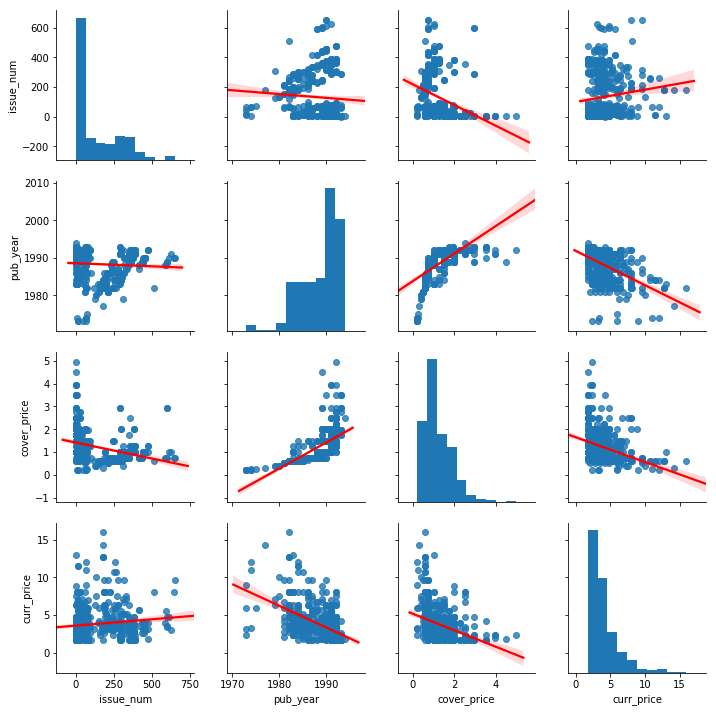

In [20]:
sns.pairplot(df, palette = "reds",kind="reg", plot_kws={'line_kws':{'color':'red'}})

In [21]:
df["publisher"].value_counts()

Marvel                     450
DC                          86
Dark Horse                  13
Image                        4
Comico                       2
Valiant/Acclaim              2
Marvel/Epic                  1
Valiant                      1
Walt Disney Productions      1
DC/Vertigo                   1
Defiant                      1
Name: publisher, dtype: int64

In [22]:
df["title"].value_counts().head(25)

New Mutants               58
Daredevil                 54
Ghost Rider               41
Iron Man                  33
Captain America           29
Batman                    26
Incredible Hulk           24
Amazing Spider-Man        24
X-Factor                  20
Fantastic Four            17
X-Force                   16
Punisher War Zone         15
Avengers                  12
Excalibur                 10
Marvel Comics Presents    10
Namor the Sub-Mariner      9
Doctor Strange             9
Star Trek                  8
Superman                   8
Next Men                   8
Web of Spider-Man          8
Detective Comics           8
Green Lantern              7
Original Ghost Rider       5
Omega Men                  5
Name: title, dtype: int64

In [23]:
df["series"].value_counts().head(25)

1983 1st Series         68
1968 1st Series         62
1964 1st Series         54
1992                    45
1990 2nd Series         37
1963 1st Series         36
1940                    26
1962-1999 1st Series    24
1986 1st Series         20
1961 1st Series         17
1991 1st Series         17
1991                    16
1988 1st Series         13
1988                    12
1987 2nd Series         11
1990 1st Series          9
1985 1st Series          8
1937 1st Series          8
1990-2004 2nd Series     7
1984 1st Series DC       7
1989                     7
1992 1st Series          6
1993                     5
1973 1st Series          5
1974 2nd Series          5
Name: series, dtype: int64